In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

Using TensorFlow backend.


# 輸入、輸出資料整理

In [2]:
(X_train,Y_train), (X_test,Y_test) = mnist.load_data()

x_train = X_train.reshape(60000,28*28)/255
x_test = X_test.reshape(10000,28*28)/255

y_train = np_utils.to_categorical(Y_train,10) 
y_test = np_utils.to_categorical(Y_test,10)

# 建構 NN 
* 4 個 hidden layers
* 每個 hidden ladyer 都有 520 個神經元
* activation function 使用 relu、loss function 使用 MSE、optimizer 使用 Adam

In [3]:
model = Sequential()

model.add(Dense(520,input_dim=28*28))
model.add(Activation('relu'))

model.add(Dense(520))
model.add(Activation('relu'))

model.add(Dense(520))
model.add(Activation('relu'))

model.add(Dense(520))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='mse', optimizer=Adam(), metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 520)               408200    
_________________________________________________________________
activation_1 (Activation)    (None, 520)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 520)               270920    
_________________________________________________________________
activation_2 (Activation)    (None, 520)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 520)               270920    
_________________________________________________________________
activation_3 (Activation)    (None, 520)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 520)               270920    
__________

In [4]:
model.fit(x_train, y_train, batch_size=200, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 23s 378us/step - loss: 0.0121 - acc: 0.9179
Epoch 2/20
60000/60000 [==============================] - 24s 400us/step - loss: 0.0051 - acc: 0.9672
Epoch 3/20
60000/60000 [==============================] - 25s 424us/step - loss: 0.0039 - acc: 0.9752
Epoch 4/20
60000/60000 [==============================] - 22s 365us/step - loss: 0.0032 - acc: 0.9800
Epoch 5/20
60000/60000 [==============================] - 15s 258us/step - loss: 0.0026 - acc: 0.9831
Epoch 6/20
60000/60000 [==============================] - 16s 265us/step - loss: 0.0025 - acc: 0.9842
Epoch 7/20
60000/60000 [==============================] - 15s 256us/step - loss: 0.0023 - acc: 0.9858
Epoch 8/20
60000/60000 [==============================] - 16s 260us/step - loss: 0.0020 - acc: 0.9879
Epoch 9/20
60000/60000 [==============================] - 15s 253us/step - loss: 0.0019 - acc: 0.9881
Epoch 10/20
60000/60000 [==============================] - 16s 259us/step - loss: 

In [5]:
predict = model.predict_classes(x_test)
score = model.evaluate(x_test, y_test)
print('testing data 的正確率：', score[1])

10000/10000 [==============================] - 1s 149us/step
testing data 的正確率： 0.9819


# 看看哪些字寫得很醜

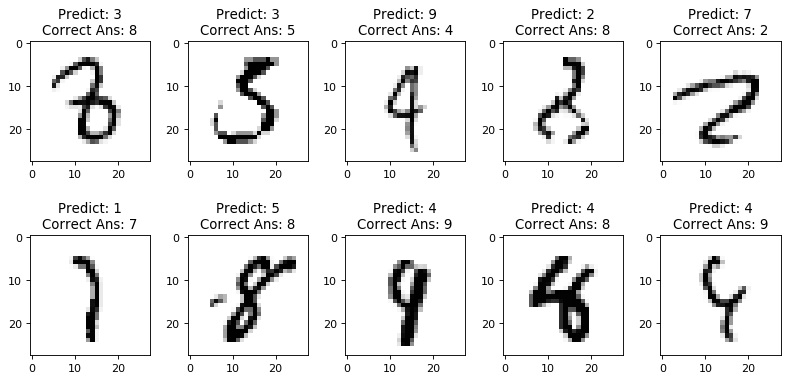

In [6]:
fail_img = X_test[predict!=Y_test]
fail_predict = predict[predict!=Y_test]
correct_ans = Y_test[predict!=Y_test]

idx = np.random.choice(range(fail_predict.size), size=10, replace=False) #隨機選10個預測錯誤的例子

plt.figure(figsize=(10,5), dpi=80)
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(fail_img[idx[i]], cmap='Greys')
    plt.title('Predict: %d\nCorrect Ans: %d' %(fail_predict[idx[i]], correct_ans[idx[i]]))
    
plt.tight_layout()
plt.show()

In [7]:
model.save_weights('7-1_weights.h5')